In [34]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [35]:
src = cv2.imread('image_cell.png')
src_bnw = src[:,:,0]

In [36]:
binary = np.ones_like(src_bnw) * 255

In [37]:
for h in range(src_bnw.shape[0]):
    for w in range(src_bnw.shape[1]):
        if src_bnw[h,w] < 50:
            binary[h,w] = src_bnw[h,w]

In [30]:
def erode_dil(src, mask_size, type):
    src_dst = np.zeros_like(src)
    mask_size = mask_size
    space = int((mask_size-1)/2)

    for h in range(space, src.shape[0]-space):
        for w in range(space, src.shape[1]-space):
            roi = src[h-space:h+space+1, w-space:w+space+1]
            if type == 'dilation':
                src_dst[h,w] = np.max(np.max(roi,axis=0),axis=0)
            elif type == 'erode':
                src_dst[h,w] = np.min(np.min(roi,axis=0),axis=0)
            else:
                print("error")
        
    return src_dst

In [31]:
src_dst1 = erode_dil(src_bnw, 3, 'erode')
src_dst2 = erode_dil(src_bnw, 3, 'dilation')

In [39]:
for h in range(src_dst1.shape[0]):
    for w in range(src_dst1.shape[1]):
        if src_dst1[h,w] < 50:
            binary[h,w] = src_dst1[h,w]

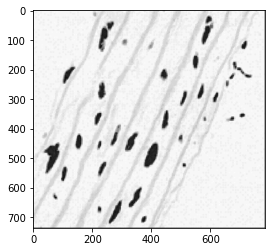

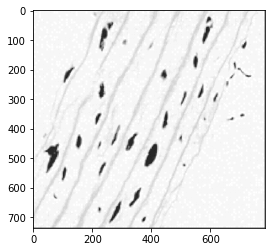

In [40]:
plt.imshow(src_dst1, cmap='gray')
plt.show()
plt.imshow(src_dst2, cmap='gray')
plt.show()

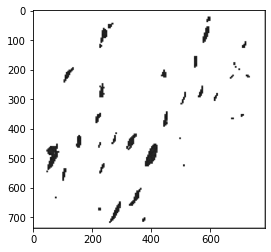

In [41]:
plt.imshow(binary, cmap='gray')
plt.show()